In [3]:
## GET IMPORTS ##

import pandas as pd
#import yfinance as yf
import tulipy
import numpy as np
import talib as ta
from talib import MA_Type
import matplotlib.pyplot as plt
pd.set_option('expand_frame_repr', False)  


In [20]:
df = pd.read_csv('MSTR.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-28,147.490005,150.460007,146.679993,146.889999,146.889999,83900
1,2020-08-31,147.259995,147.960007,143.990005,144.440002,144.440002,80300
2,2020-09-01,145.009995,149.100006,145.009995,148.820007,148.820007,86300
3,2020-09-02,148.460007,151.229996,147.740005,150.000000,150.000000,100500
4,2020-09-03,148.750000,148.750000,143.910004,144.279999,144.279999,79000
...,...,...,...,...,...,...,...
247,2021-08-23,741.900024,747.780029,710.059998,718.510010,718.510010,813800
248,2021-08-24,717.929993,717.929993,691.219971,715.500000,715.500000,811400
249,2021-08-25,714.650024,735.099976,705.000000,726.710022,726.710022,664900
250,2021-08-26,712.000000,714.500000,691.549988,693.659973,693.659973,571500


In [31]:
## CALCULATE TECHNICAL INDICATORS ##

df['ADX'] = ta.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
df['CCI-14'] = ta.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
df['CCI-20'] = ta.CCI(df['High'], df['Low'], df['Close'], timeperiod=20)
df['MACD'], df['MACDSIGNAL'], df['MACDHIST'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['UPPER_BB'], df['MIDDLE_BB'], df['LOWER_BB'] = ta.BBANDS(df['Close'], matype=MA_Type.T3)
df['EMA-10'] = ta.EMA(df['Close'], timeperiod=10)
df['EMA-30'] = df['Close'].ewm(span=30).mean()
df['MFI'] = ta.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=14)
df['NATR-14'] = ta.NATR(df['High'], df['Low'], df['Close'], timeperiod=14)
df['Stochastic-slowk'], df['Stochastic-slowd'] = ta.STOCH(df['High'], df['Low'], df['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df['Williams%R'] = ta.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)

df = df.reset_index()

#CREATE SIGNALS FROM RSI ##

def signal_cat(RSI_col) :
    current_RSI=RSI_col['RSI']
    prev_RSI=RSI_col['prev_RSI']
    if current_RSI < 30:
        return 'OVERSOLD'
    elif current_RSI > 70:
        return 'OVERBOUGHT'
    elif prev_RSI < 30 and current_RSI >= 30:
        return 'BULL SIGNAL'
    elif prev_RSI >= 70 and current_RSI < 70:
        return 'BEAR SIGNAL'
    else:
        return 'NO SIGNAL'

df['prev_RSI'] = df['RSI'].shift(1)
df['signal_RSI']=df[['prev_RSI', 'RSI']].apply(signal_cat, axis=1)


#CREATE SIGNALS FROM CCI ##

def signal_cat2(CCI_col) :
    current_CCI=CCI_col['CCI-14']
    prev_CCI=CCI_col['prev_CCI']
    if current_CCI < -200:
        return 'OVERSOLD'
    elif current_CCI > 200:
        return 'OVERBOUGHT'
    elif prev_CCI < -200 and current_CCI >= -200:
        return 'BULL SIGNAL'
    elif prev_CCI >= 200 and current_CCI < 200:
        return 'BEAR SIGNAL'
    else:
        return 'NO SIGNAL'

df['prev_CCI'] = df['CCI-14'].shift(1)
df['signal_CCI']=df[['prev_CCI', 'CCI-14']].apply(signal_cat2, axis=1)

#####
#####



In [32]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,ADX,CCI-14,...,MFI,NATR-14,Stochastic-slowk,Stochastic-slowd,Williams%R,RSI,prev_RSI,signal_RSI,prev_CCI,signal_CCI
0,0,2020-08-28,147.490005,150.460007,146.679993,146.889999,146.889999,83900,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO SIGNAL,NaN,NO SIGNAL
1,1,2020-08-31,147.259995,147.960007,143.990005,144.440002,144.440002,80300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO SIGNAL,NaN,NO SIGNAL
2,2,2020-09-01,145.009995,149.100006,145.009995,148.820007,148.820007,86300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO SIGNAL,NaN,NO SIGNAL
3,3,2020-09-02,148.460007,151.229996,147.740005,150.000000,150.000000,100500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO SIGNAL,NaN,NO SIGNAL
4,4,2020-09-03,148.750000,148.750000,143.910004,144.279999,144.279999,79000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO SIGNAL,NaN,NO SIGNAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,2021-08-23,741.900024,747.780029,710.059998,718.510010,718.510010,813800,23.192996,28.094137,...,66.063497,5.968745,59.634378,36.273240,-47.318290,58.170022,57.918902,NO SIGNAL,7.497889,NO SIGNAL
248,248,2021-08-24,717.929993,717.929993,691.219971,715.500000,715.500000,811400,22.690992,-19.139962,...,59.056222,5.838159,72.526496,56.138862,-50.213029,57.598646,58.170022,NO SIGNAL,28.094137,NO SIGNAL
249,249,2021-08-25,714.650024,735.099976,705.000000,726.710022,726.710022,664900,22.530601,10.756359,...,57.434384,5.633377,74.104364,68.755079,-45.532334,59.205753,57.598646,NO SIGNAL,-19.139962,NO SIGNAL
250,250,2021-08-26,712.000000,714.500000,691.549988,693.659973,693.659973,571500,22.026393,-40.671769,...,49.160169,5.842283,55.426056,67.352305,-66.641133,52.846165,59.205753,NO SIGNAL,10.756359,NO SIGNAL


In [ ]:
#df.rename(columns={'Datetime': 'Date'}, inplace=True, errors='raise')


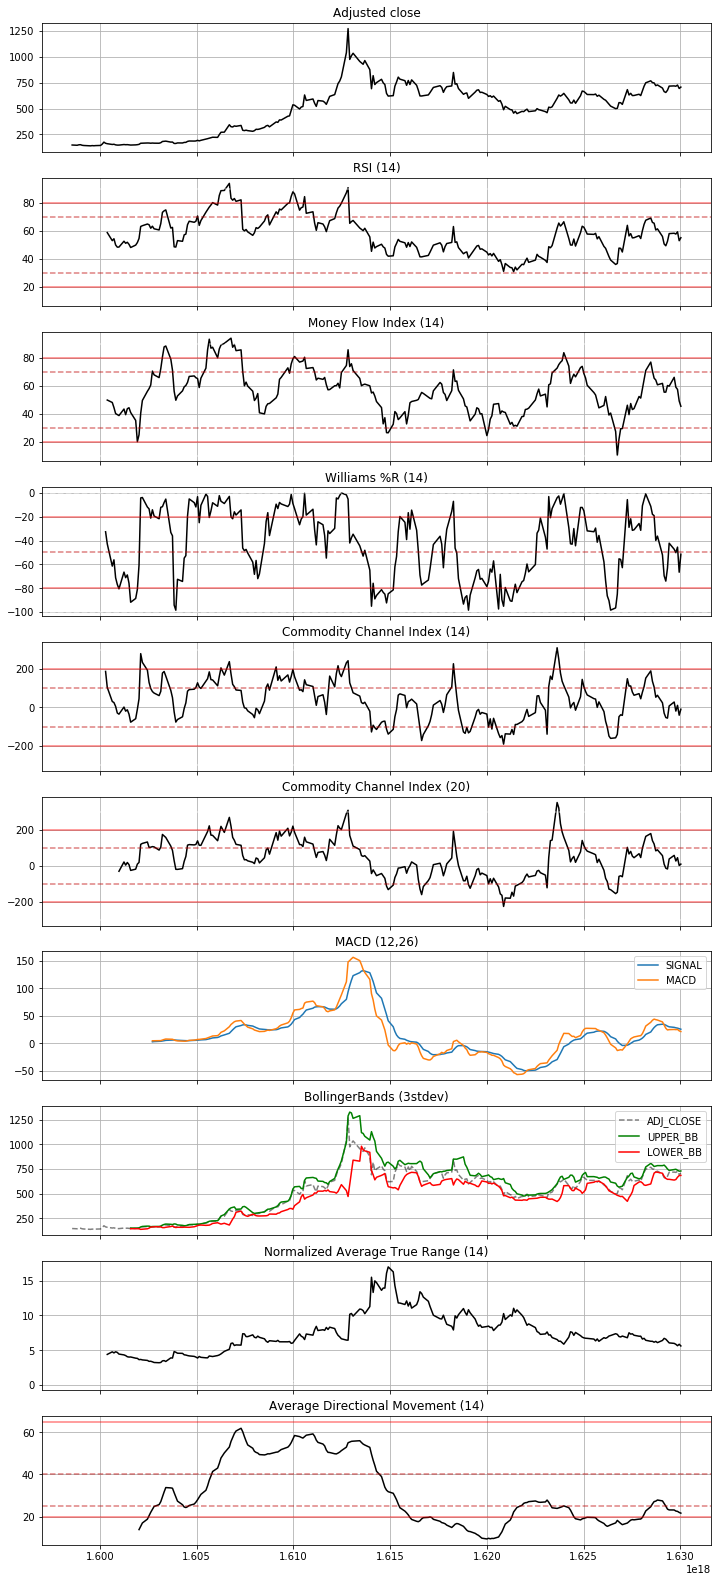

In [11]:

df['Date'] = pd.to_numeric(pd.to_datetime(df['Date']))

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, figsize=(12,28), sharex=True)


line_color_1 = '#ff0000'
line_color_2 = '#bf0000'


ax1.title.set_text('Adjusted close')
ax1.plot(df['Date'], df['Adj Close'], color='black', label='Adj close 1 min')
#ax1.plot(df_5_min['Adj Close'], color='red', label='Adj close 5 min')


#df_5_min

ax1.grid()

ax2.title.set_text('RSI (14)')
ax2.plot(df['Date'], df['RSI'], color='black')
ax2.axhline(10, linestyle='--', alpha=0.5, color='w')
ax2.axhline(20, linestyle='-', alpha=0.5, color=line_color_1)
ax2.axhline(30, linestyle='--', alpha=0.5, color=line_color_2)
ax2.axhline(70, linestyle='--', alpha=0.5, color=line_color_2)
ax2.axhline(80, linestyle='-', alpha=0.5, color=line_color_1)
ax2.axhline(90, linestyle='--', alpha=0.5, color='w')


#ax2.fill_between(70, 80, color='red')

ax2.grid()

ax3.title.set_text('Money Flow Index (14)')
ax3.plot(df['Date'], df['MFI'], color='black')
ax3.axhline(10, linestyle='--', alpha=0.5, color='w')
ax3.axhline(20, linestyle='-', alpha=0.5, color=line_color_1)
ax3.axhline(30, linestyle='--', alpha=0.5, color=line_color_2)
ax3.axhline(70, linestyle='--', alpha=0.5, color=line_color_2)
ax3.axhline(80, linestyle='-', alpha=0.5, color=line_color_1)
ax3.axhline(90, linestyle='--', alpha=0.5, color='w')
ax3.grid()

ax4.title.set_text('Williams %R (14)')
ax4.plot(df['Date'], df['Williams%R'], color='black')
ax4.axhline(-100, linestyle='--', alpha=0.5, color='w')
ax4.axhline(-80, linestyle='-', alpha=0.5, color=line_color_1)
ax4.axhline(-50, linestyle='--', alpha=0.5, color=line_color_2)
ax4.axhline(-20, linestyle='-', alpha=0.5, color=line_color_1)

ax4.axhline(0, linestyle='--', alpha=0.5, color='w')
ax4.grid()

ax5.title.set_text('Commodity Channel Index (14)')
ax5.plot(df['Date'], df['CCI-14'], color='black')
ax5.axhline(-300, linestyle='--', alpha=0.5, color='w')
ax5.axhline(-200, linestyle='-', alpha=0.5, color=line_color_1)
ax5.axhline(-100, linestyle='--', alpha=0.5, color=line_color_2)
ax5.axhline(100, linestyle='--', alpha=0.5, color=line_color_2)
ax5.axhline(200, linestyle='-', alpha=0.5, color=line_color_1)
ax5.axhline(300, linestyle='--', alpha=0.5, color='w')
ax5.grid()

ax6.title.set_text('Commodity Channel Index (20)')
ax6.plot(df['Date'], df['CCI-20'], color='black')
ax6.axhline(-300, linestyle='--', alpha=0.5, color='w')
ax6.axhline(-200, linestyle='-', alpha=0.5, color=line_color_1)
ax6.axhline(-100, linestyle='--', alpha=0.5, color=line_color_2)
ax6.axhline(100, linestyle='--', alpha=0.5, color=line_color_2)
ax6.axhline(200, linestyle='-', alpha=0.5, color=line_color_1)
ax6.axhline(300, linestyle='--', alpha=0.5, color='w')
ax6.grid()

ax7.title.set_text('MACD (12,26)')
ax7.plot(df['Date'], df['MACDSIGNAL'], label='SIGNAL')
ax7.plot(df['Date'], df['MACD'], label='MACD')
ax7.legend()
ax7.grid()

ax8.title.set_text('BollingerBands (3stdev)')
ax8.plot(df['Date'], df['Adj Close'], label='ADJ_CLOSE', linestyle='--', alpha=0.5, color='black')
ax8.plot(df['Date'], df['UPPER_BB'], label='UPPER_BB', color='green')
ax8.plot(df['Date'], df['LOWER_BB'], label='LOWER_BB', color='red')
ax8.legend()
ax8.grid()

ax9.title.set_text('Normalized Average True Range (14)')
ax9.plot(df['Date'], df['NATR-14'], color='black')
ax9.axhline(0.1, linestyle='--', alpha=0.5, color='w')
ax9.axhline(0.6, linestyle='--', alpha=0.5, color='w')
ax9.grid()

ax10.title.set_text('Average Directional Movement (14)')
ax10.plot(df['Date'], df['ADX'], color='black')
ax10.axhline(20, linestyle='-', alpha=0.5, color=line_color_1)
ax10.axhline(25, linestyle='--', alpha=0.5, color=line_color_2)
ax10.axhline(40, linestyle='--', alpha=0.5, color=line_color_2)
ax10.axhline(65, linestyle='-', alpha=0.5, color=line_color_1)
#ax10.axhline(200, linestyle='--', alpha=0.5, color='red')
#ax10.axhline(300, linestyle='--', alpha=0.5, color='w')
ax10.grid()


#import matplotlib.dates as mdates
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())
#ax.plot('date', 'adj_close', data=data)


In [12]:
import cufflinks as cf

#df = yf.download('^ndx', period="1d", interval='1m')

cf.set_config_file(theme='pearl',sharing='public',offline=True)
df.iplot(kind="ohlc", keys=["Open", "High", "Low", "Close"],rangeslider=True)

In [13]:
qf=cf.QuantFig(df,title='I want to believe in Nasdaq',legend='top',name='GS',rangeslider=True)
qf.add_bollinger_bands(40)
qf.add_volume()
qf.add_rsi(14)
qf.add_cci()
qf.iplot()